### File to generate the Mel Frequency Spectrogram (melspec) and the Mel Frequency Cepstrum Coefficients spectrogram (mfcc) from songs/music.

In [7]:
import os
import csv
import librosa
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import minmax_scale
from playsound import playsound
from IPython.display import Audio

In [8]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [9]:
# the initial feature extraction from the audio file
def mir(y, sr, hop_length=512, margin=8, bins_per_octave=12*3, n_bins=12*7*3, fmax = 8192):
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)

    cqt = librosa.cqt(y=y, sr=sr, bins_per_octave=bins_per_octave, n_bins=n_bins)
    stft = librosa.stft(y)
    abs_stft_squared = np.abs(stft)**2

    abs_cqt = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=bins_per_octave, n_bins=n_bins))

    # Get the harmonic component of the audio signal. 
    y_harmonic_only = librosa.effects.harmonic(y=y, margin=margin)

    # Separate harmonic from percussive components  :
    y_harmonic, y_percussive = librosa.decompose.hpss(stft)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=32)
    melspec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length, n_mels=32, fmax=fmax)

    return melspec, mfcc, chroma_cqt, chroma_stft, cqt, stft, abs_stft_squared, abs_cqt, y_harmonic_only, y_harmonic, y_percussive

In [10]:
def write_melspec_and_mfcc(melspec, mfcc, filename, fig_width = 18, fig_height = 5, fmax = 8192, root_dir = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/'):
    S_db = librosa.power_to_db(melspec, ref=np.max)

    ###
    # write out the mfcc and melspec images to files
    ###
    plt.figure(figsize=(fig_width, fig_height))
    librosa.display.specshow(mfcc, fmax=fmax, cmap='magma')
    plt.margins(0)
    fpath = root_dir + 'mfcc_foo/mfcc_' + filename + '.png'
    plt.savefig(fpath, transparent=False, bbox_inches='tight', pad_inches=0, dpi=100)

    plt.figure(figsize=(fig_width, fig_height))
    librosa.display.specshow(S_db, fmax=fmax, cmap='magma')
    plt.margins(0)
    fpath = root_dir + 'melspec_foo/melspec_' + filename + '.png'
    plt.savefig(fpath, transparent=False, bbox_inches='tight', pad_inches=0, dpi=100)

In [11]:
def spectrograms(music_csv, csv_outfile, root_dir = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/'):
    for row in music_csv.itertuples(index=False):
        filepath = row.file.replace("xyzyx", ",")
        if filepath.startswith('DONE!'):
            continue
        # replace "xyzyx" string in the song or filepath (in the CSV file) with the original comma ","
        song = filepath.split('/')[-1].replace("xyzyx", ",")
        artist = filepath.split('/')[-3].replace("xyzyx", ",")

        # replace the comma in the artist and song with "__" to write out to the CSV file
        artist_and_song = artist + '__' + song
        artist_and_song = artist_and_song.replace(",", "_")
        genre = row.genre
        mood = row.mood
        print(filepath, artist_and_song, genre, mood)

        # y (audio data) is of type numpy.ndarray
        # sr (sample rate) is of type int 
        y, sr = librosa.load(filepath, offset=10.0, duration=30.0)
        melspec, mfcc, chroma_cqt, chroma_stft, cqt, stft, abs_stft_squared, abs_cqt, y_harmonic_only, y_harmonic, y_percussive = mir(y, sr, hop_length=512, margin=8, bins_per_octave=12*3, n_bins=12*7*3, fmax=8192)

        write_melspec_and_mfcc(melspec, mfcc, artist_and_song, fig_width = 20.65, fig_height = 5.2, fmax = 10000, root_dir = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/')
        csv_outfile.write('melspec_' + artist_and_song + '.png,' + str(genre) + ',' + str(mood) + '\n')



/Users/sonatin/Music/Music/Media/Music/Ray Brown/Ray Brown, Monty Alexander & Russell Malone/01 Django.m4a Ray Brown__01 Django.m4a 0 2


/var/folders/vj/3fp834_50vx9z6rfk58683x80000gn/T/ipykernel_41545/391571254.py:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, offset=10.0, duration=30.0)
/usr/local/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/Users/sonatin/Music/Music/Media/Music/Art Tatum/The Best of the Pablo Group Masterpieces/05 Body and Soul.m4a Art Tatum__05 Body and Soul.m4a 0 0
/Users/sonatin/Music/Music/Media/Music/Chet Baker/Chet/1-01 Alone Together.m4a Chet Baker__1-01 Alone Together.m4a 0 0
/Users/sonatin/Music/Music/Media/Music/Compilations/Mostly Piano (Audiophile Edition SEA)/1-11 Improv (Mostly Piano).m4a Compilations__1-11 Improv (Mostly Piano).m4a 0 0
/Users/sonatin/Music/Music/Media/Music/Compilations/Mostly Piano (Audiophile Edition SEA)/1-04 We Kiss In A Shadow (Mostly Piano).m4a Compilations__1-04 We Kiss In A Shadow (Mostly Piano).m4a 0 1
/Users/sonatin/Music/Music/Media/Music/Compilations/Narada Decade_ The Anniversary Collection, Disc 1/1-06 Girl from Barcelona.m4a Compilations__1-06 Girl from Barcelona.m4a 0 1
Done!


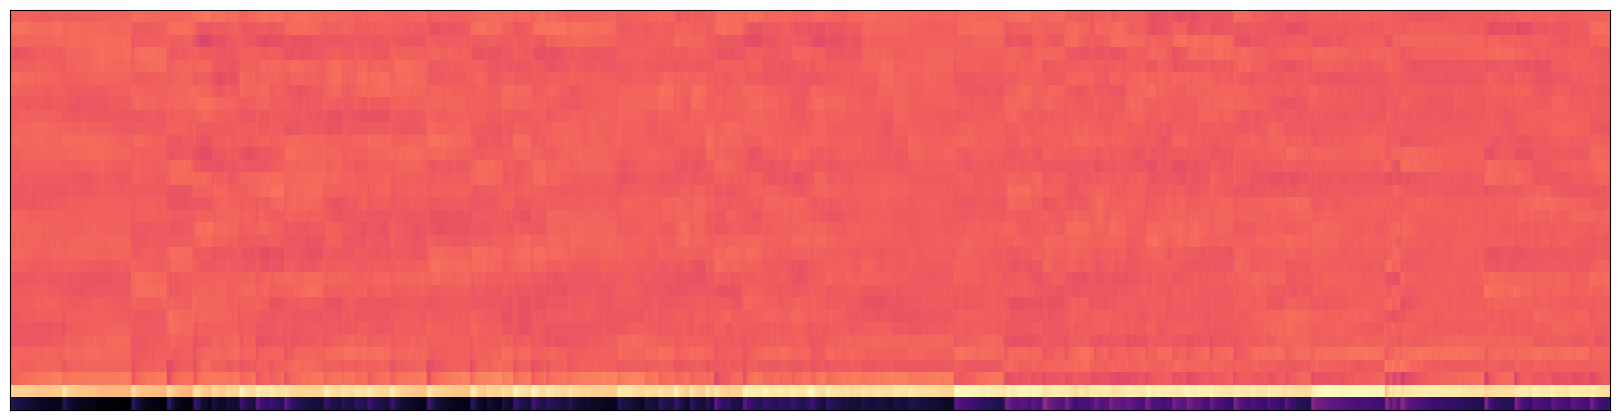

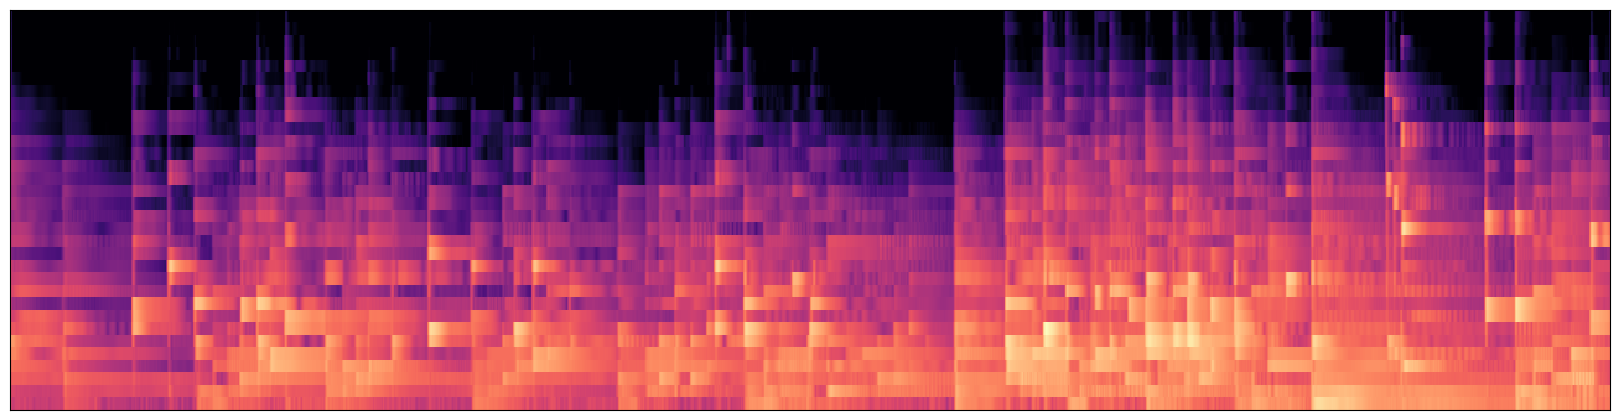

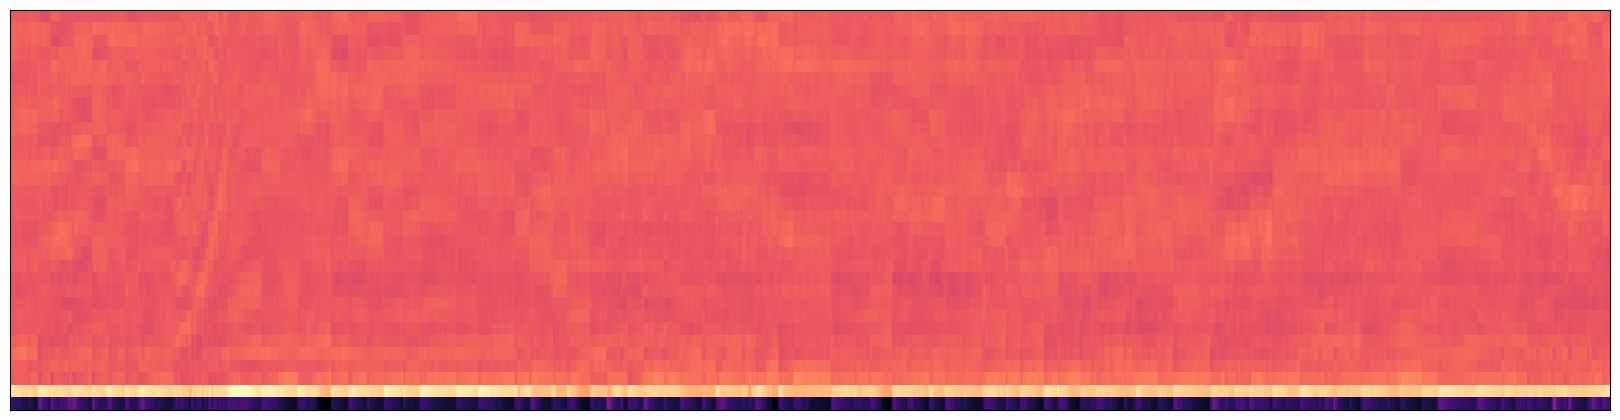

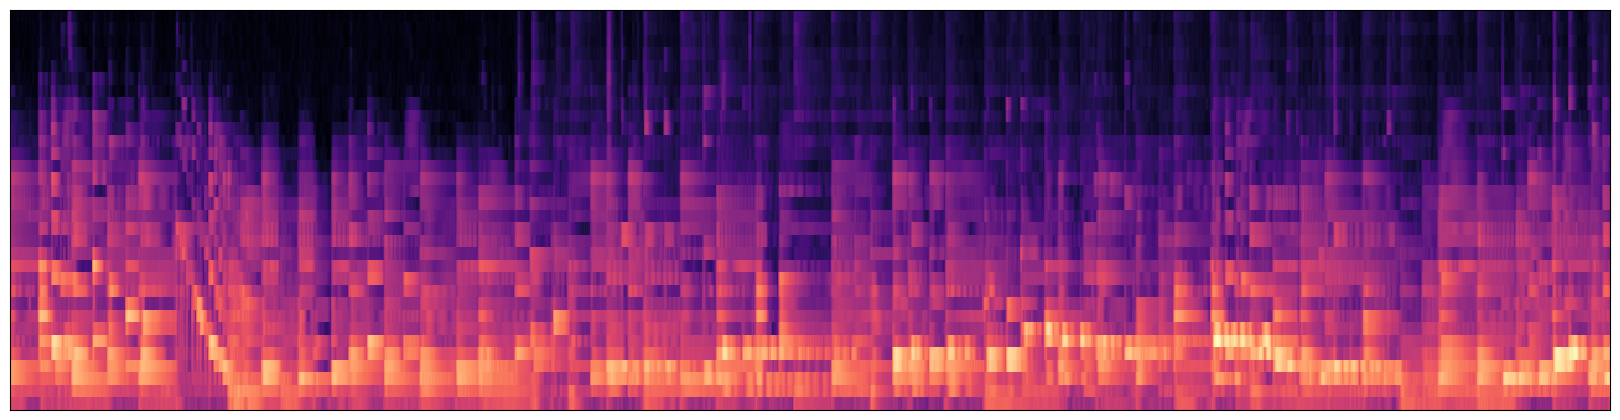

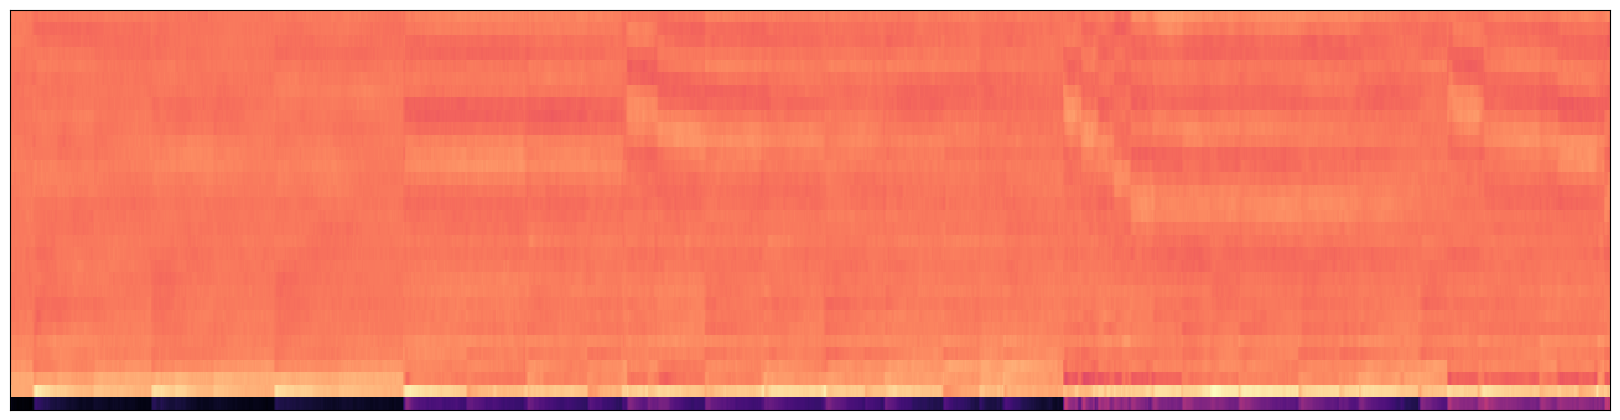

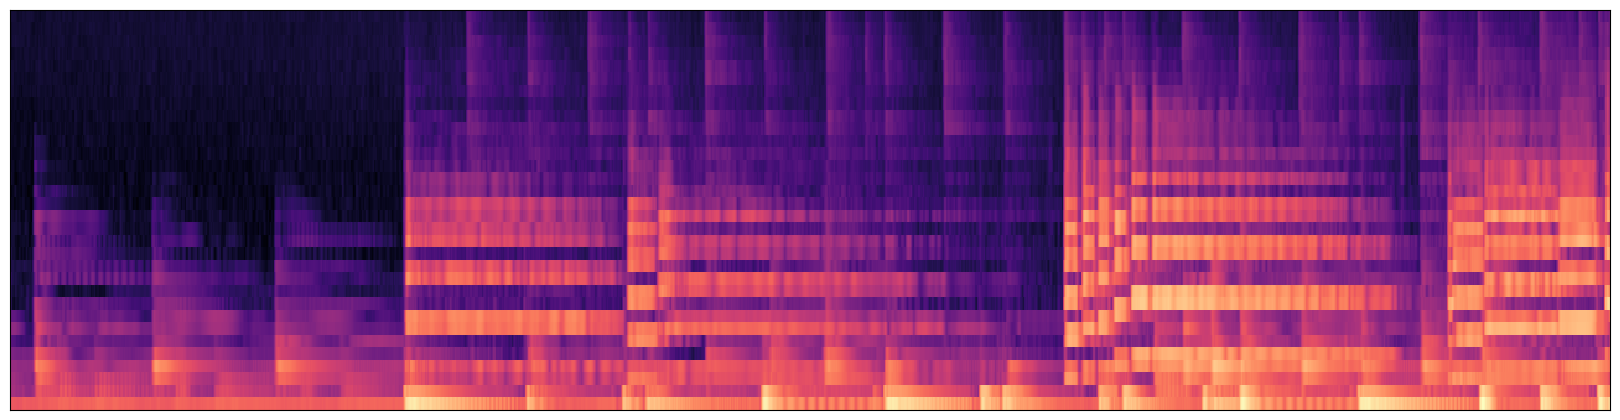

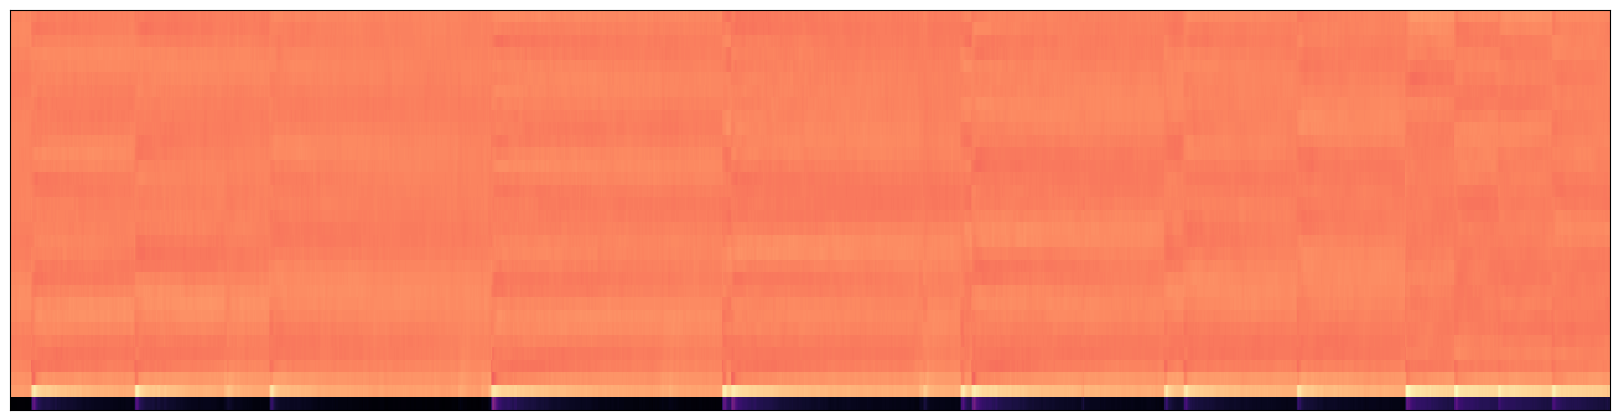

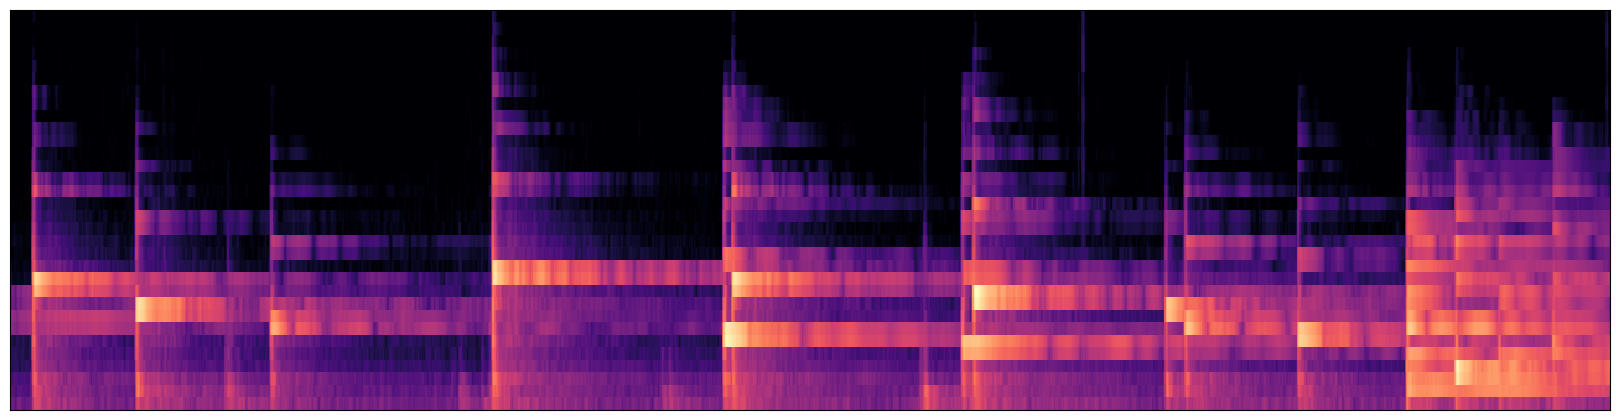

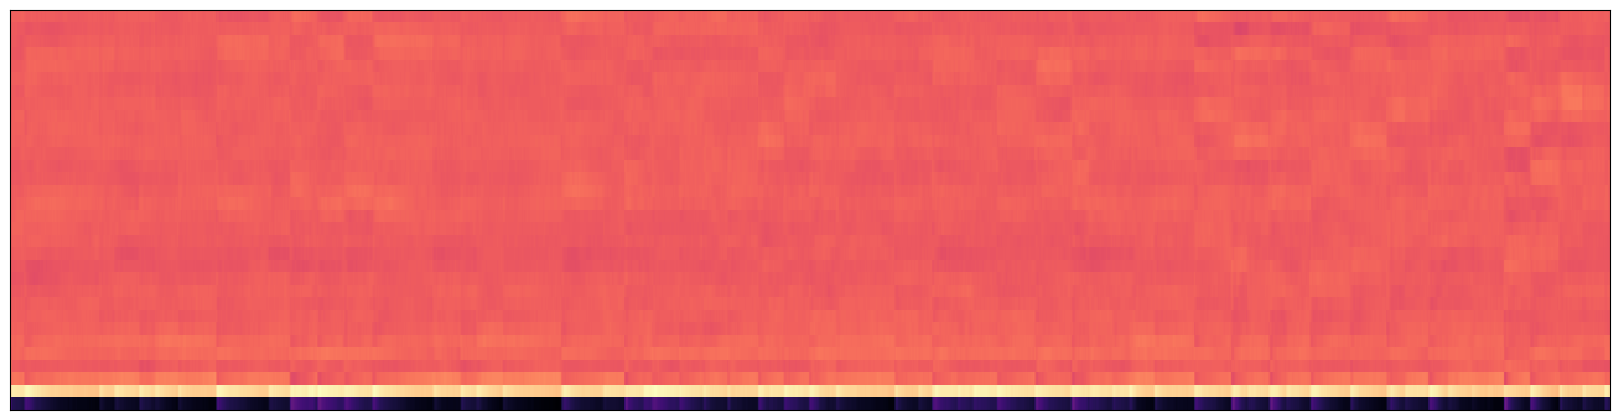

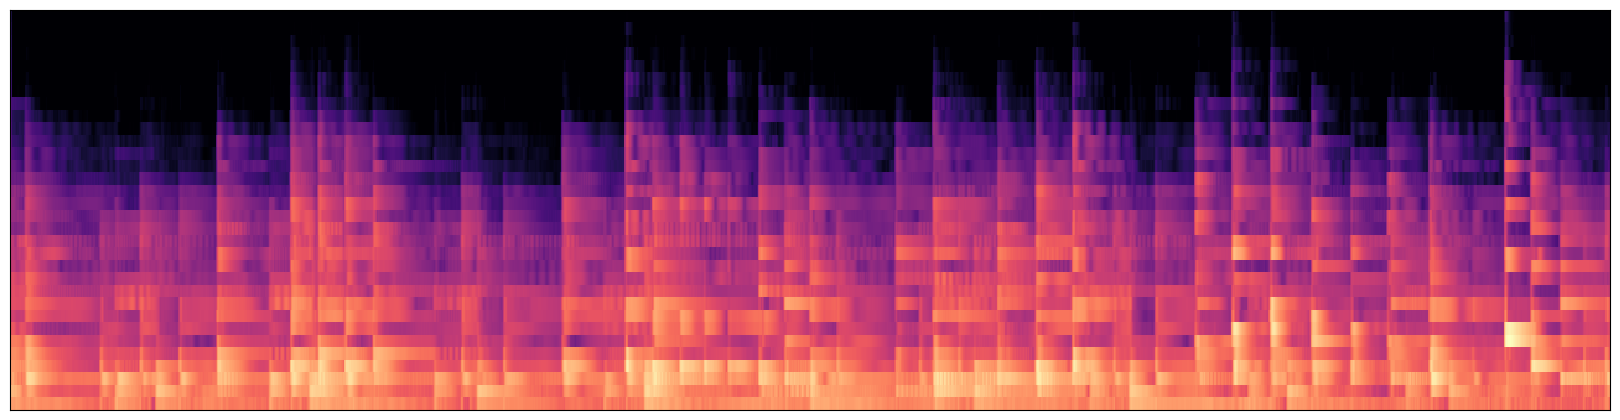

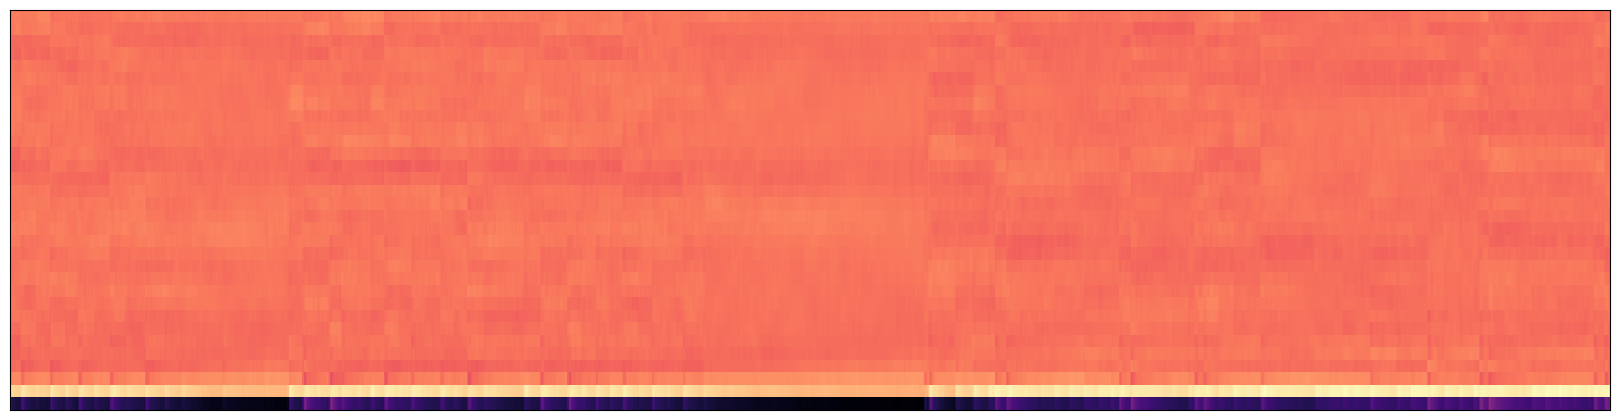

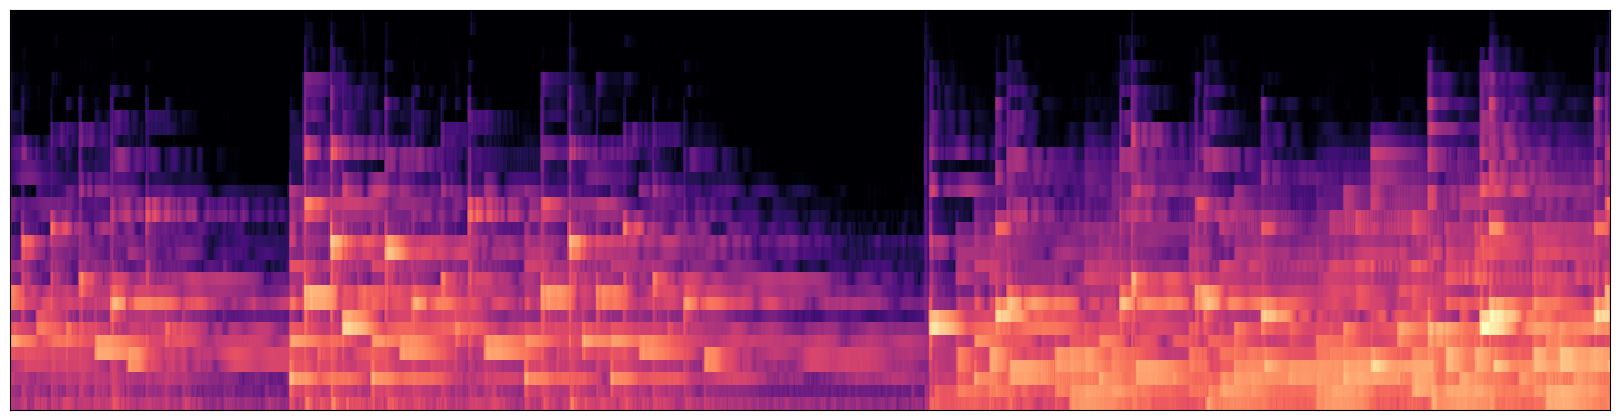

In [12]:
csv_file = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/foo.csv'
melspec_csv_file = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/music_melspec_data_foo.csv'
music_csv = pd.read_csv(csv_file, dtype={'file':str, 'genre':np.int64, 'mood':np.int64})

with open(melspec_csv_file, 'a') as outfile:
    # write header
    outfile.write('image,genre,mood')
    # go through the music.csv file and write out the melspec and mfcc images
    spectrograms(music_csv, outfile, root_dir = '/Users/sonatin/src/AI/MIT/Capstone/music-playlist/')
    outfile.close()
    print('Done!')
